In [2]:
import torch
from stable_diffusion_sds import StableDiffusion
import matplotlib.pyplot as plt
from tqdm import tqdm
from einops import reduce

In [27]:
!pip install kornia
import kornia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.0/612.0 kB 16.3 MB/s eta 0:00:00 MB/s eta 0:00:01


In [3]:
device = "cuda"#"cpu"

In [4]:
def show(t):
    plt.imshow(t.permute(1,2,0).cpu().numpy())

In [9]:
sd_sds = StableDiffusion(device)

[INFO] loading stable diffusion...
[INFO] loaded stable diffusion!


In [10]:
text_embeds = sd_sds.get_text_embeds(["a beautiful face"], [""])
text_embeds.shape

torch.Size([2, 77, 1024])

In [11]:
sd_sds.train_step(text_embeds, torch.rand((1,3,64,64), device=device))

tensor([1.], device='cuda:0', grad_fn=<SpecifyGradientBackward>)

In [12]:
# dummy img training
init_img = torch.rand(1,3,512,512, device=device, requires_grad=True)
init_img.mean()

tensor(0.5006, device='cuda:0', grad_fn=<MeanBackward0>)

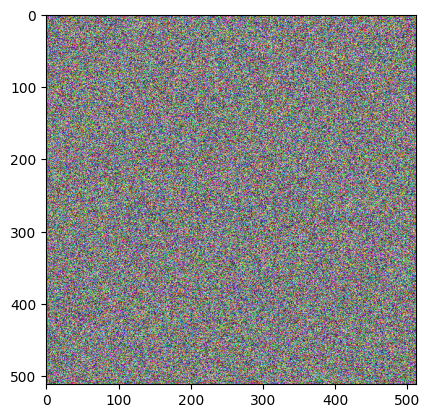

In [13]:
show(init_img[0].detach())

In [58]:
opt_t = torch.optim.SGD([init_img], 1.5) #torch.optim.Adam([init_img], 0.1)

In [59]:
for i in tqdm(range(90)):
    # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
    override_t = torch.tensor([5+i*10], dtype=torch.long, device=device)
    loss = sd_sds.train_step(text_embeds, init_img, guidance_scale=50, override_t=override_t)
    loss = loss 
    loss.backward()
    opt_t.step()
    opt_t.zero_grad()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:12<00:00,  7.04it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


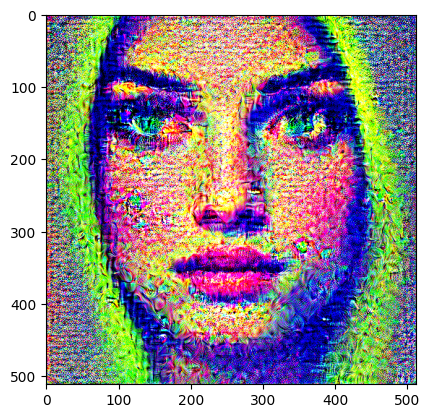

In [60]:
show(init_img[0].detach())

In [50]:
init_img[0][2].std()

tensor(0.3146, device='cuda:0', grad_fn=<StdBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


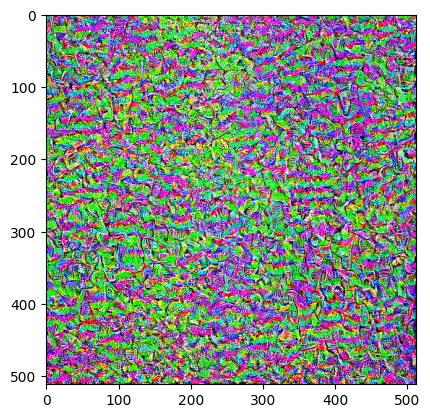

In [56]:
show(init_img[0].detach())

In [52]:
init_img.mean()

tensor(0.4831, grad_fn=<MeanBackward0>)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 950/950 [02:14<00:00,  7.04it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


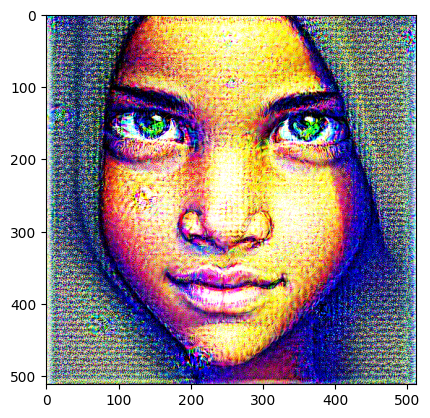

In [14]:
# dummy img training
init_img = torch.rand(1,3,512,512, device=device, requires_grad=True)
init_img.mean()
opt_t = torch.optim.SGD([init_img], 0.5) #torch.optim.Adam([init_img], 0.1)
for i in tqdm(range(950)):
    # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
    override_t = torch.tensor([975-i], dtype=torch.long, device=device)
    loss = sd_sds.train_step(text_embeds, init_img, guidance_scale=50, override_t=override_t)
    loss = loss
    loss.backward()
    opt_t.step()
    opt_t.zero_grad()
result = init_img[0].detach()
show(result)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 950/950 [02:15<00:00,  7.02it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


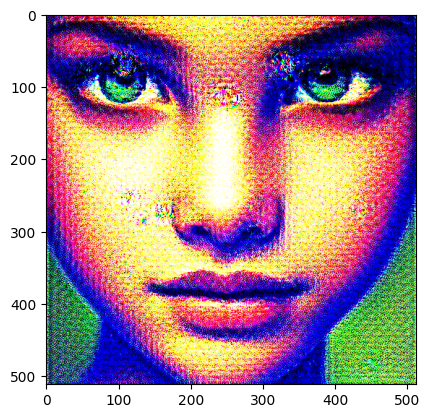

In [15]:
# dummy img training (random t)
init_img = torch.rand(1,3,512,512, device=device, requires_grad=True)
init_img.mean()
opt_t = torch.optim.SGD([init_img], 0.5) #torch.optim.Adam([init_img], 0.1)
for i in tqdm(range(950)):
    # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
    override_t = None#torch.tensor([975-i], dtype=torch.long, device=device)
    loss = sd_sds.train_step(text_embeds, init_img, guidance_scale=50, override_t=override_t)
    loss = loss
    loss.backward()
    opt_t.step()
    opt_t.zero_grad()
result = init_img[0].detach()
show(result)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 950/950 [02:15<00:00,  7.02it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


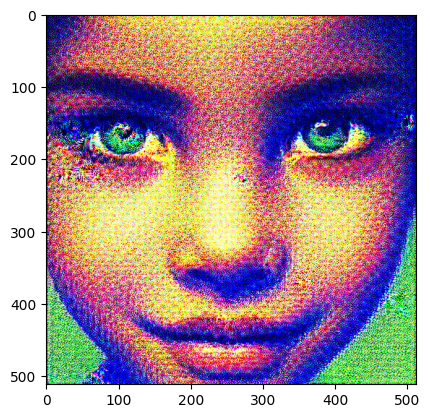

In [20]:
# dummy img training (random t)
init_img = torch.rand(1,3,512,512, device=device, requires_grad=True)
init_img.mean()
opt_t = torch.optim.SGD([init_img], 0.2) #torch.optim.Adam([init_img], 0.1)
for i in tqdm(range(950)):
    # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
    override_t = None#torch.tensor([975-i], dtype=torch.long, device=device)
    loss = sd_sds.train_step(text_embeds, init_img, guidance_scale=50, override_t=override_t)
    loss = loss
    loss.backward()
    opt_t.step()
    opt_t.zero_grad()
result = init_img[0].detach()
show(result)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:43<00:00,  6.84it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


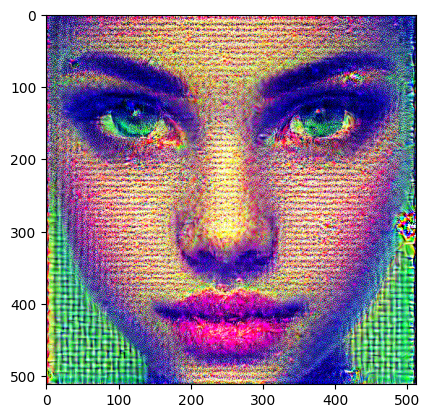

In [36]:
# dummy img training (random t)
init_img = torch.rand(1,3,512,512, device=device, requires_grad=True)
init_img.mean()
opt_t = torch.optim.SGD([init_img], 0.3) #torch.optim.Adam([init_img], 0.1)
for i in tqdm(range(300)):
    # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
    override_t = None#torch.tensor([975-i], dtype=torch.long, device=device)
    loss = sd_sds.train_step(text_embeds, init_img, guidance_scale=50, override_t=override_t)
    loss = loss
    loss.backward()
    opt_t.step()
    opt_t.zero_grad()
result = init_img[0].detach()
show(result)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:43<00:00,  6.93it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


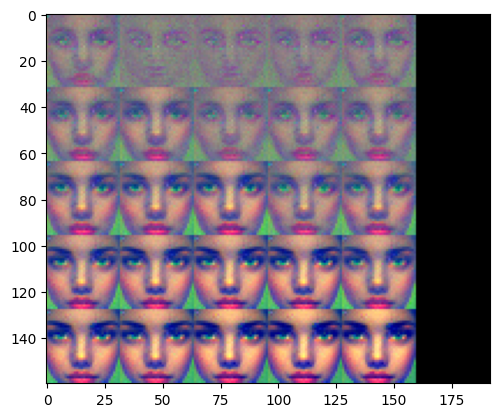

In [37]:
# dummy img training (random t)
init_img = torch.rand(1,3,512,512, device=device, requires_grad=True)
init_img.mean()
opt_t = torch.optim.SGD([init_img], 0.3) #torch.optim.Adam([init_img], 0.1)
res = torch.zeros(3, 32*5,32*6)
for i in tqdm(range(300)):
    # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
    override_t = None#torch.tensor([975-i], dtype=torch.long, device=device)
    loss = sd_sds.train_step(text_embeds, init_img, guidance_scale=50, override_t=override_t)
    loss = loss
    loss.backward()
    opt_t.step()
    opt_t.zero_grad()
    if i % 10 == 0:
        j = i // 10
        result = init_img[0].detach()
        small = reduce(result, "c (h a) (w b) -> c h w", "mean", a=16, b=16)
        res[:, 32*(j//6):32*(j//6 + 1), 32*(j%5):32*(j%5+1)] = small
show(res)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


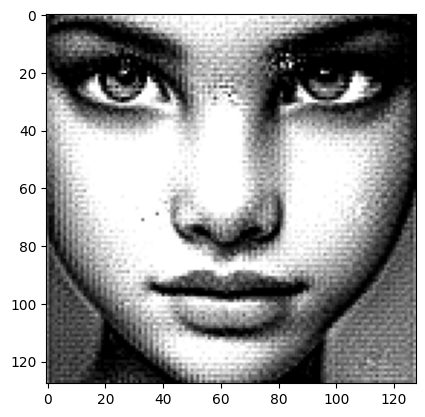

In [19]:
small = reduce(result, "c (h a) (w b) -> c h w", "mean", a=4, b=4)
small = small.mean(axis=0).repeat((3,1,1))
show(small)

In [122]:
torch.rand(3,64,64).mean(axis=0).repeat(3,1,1).shape

torch.Size([3, 64, 64])

In [123]:
small.mean(axis=1).repeat((3,1,1)).shape

torch.Size([3, 3, 64])

In [38]:
torch.bmm(torch.randn(3,512,16), torch.randn(3,16,512)).shape

torch.Size([3, 512, 512])

tensor(0.2492, device='cuda:0', grad_fn=<MeanBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:42<00:00,  7.03it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


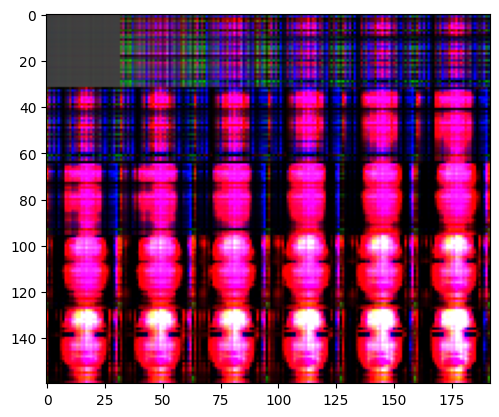

In [21]:
# dummy img training (random t)
torch.manual_seed(100)
init_a = (0.125*torch.rand(1,3,512,64, device=device)).clone()
init_b = (0.125*torch.rand(1,3,64,512, device=device)).clone()
init_a.requires_grad_(True)
init_b.requires_grad_(True)
print(torch.bmm(init_a[0], init_b[0]).mean())
opt_t = torch.optim.Adam([init_a, init_b], 0.03)#torch.optim.SGD([init_a, init_b], 0.01) 
res = torch.zeros(3, 32*5,32*6)
for i in tqdm(range(300)):
    # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
    override_t = None#torch.tensor([975-i], dtype=torch.long, device=device)
    render = torch.bmm(init_a[0], init_b[0]).unsqueeze(0)
    loss = sd_sds.train_step(text_embeds, render, guidance_scale=50, override_t=override_t)
    loss.backward()
    #with torch.no_grad():
    #    print(init_a.grad.mean() + init_b.grad.mean())
    opt_t.step()
    opt_t.zero_grad()
    if i % 10 == 0:
        j = i // 10
        result = render[0].detach()
        small = reduce(result, "c (h a) (w b) -> c h w", "mean", a=16, b=16)
        res[:, 32*(j//6):32*(j//6 + 1), 32*(j%6):32*(j%6+1)] = small
show(res)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


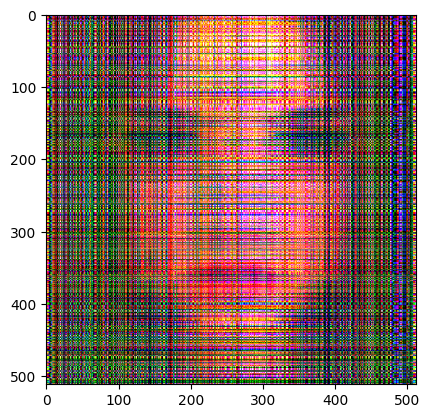

In [39]:
show(result*0.5)

In [24]:
result.min()

tensor(-38.7865, device='cuda:0')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:35<00:00,  6.95it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


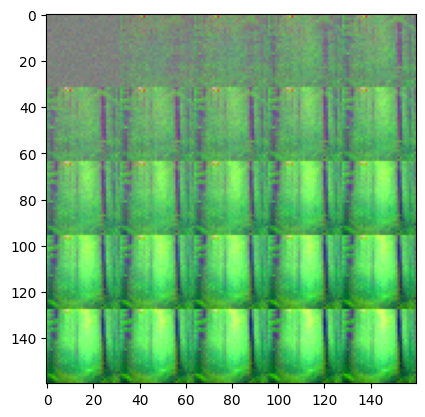

In [56]:
# dummy img training (random t)
torch.manual_seed(117)
text_embeds = sd_sds.get_text_embeds(["gorgeous rainforrest brush"], [""])
init_img = torch.rand(1,3,512,512, device=device, requires_grad=True)
init_img.mean()
opt_t = torch.optim.SGD([init_img], 0.2) #torch.optim.Adam([init_img], 0.1)
res = torch.zeros(3, 32*5,32*5)
for i in tqdm(range(250)):
    # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
    override_t = None#torch.tensor([975-i], dtype=torch.long, device=device)
    loss = sd_sds.train_step(text_embeds, init_img, guidance_scale=100, override_t=override_t)
    loss = loss
    loss.backward()
    opt_t.step()
    opt_t.zero_grad()
    if i % 10 == 0:
        j = i // 10
        result = init_img[0].detach()
        small = reduce(result, "c (h a) (w b) -> c h w", "mean", a=16, b=16)
        res[:, 32*(j//5):32*(j//5 + 1), 32*(j%5):32*(j%5+1)] = small
show(res)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


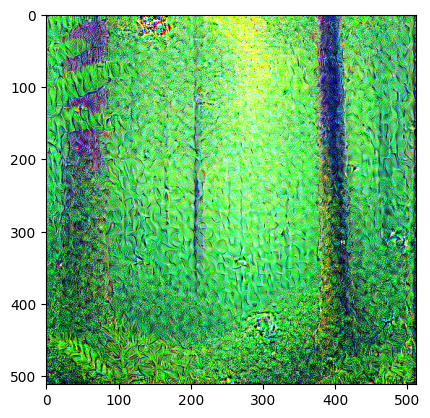

In [57]:
show(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


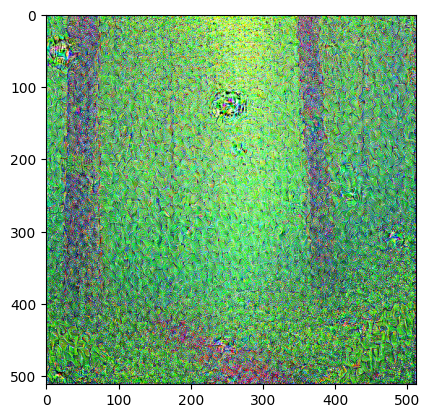

In [55]:
show(result)

In [52]:
result.max()

tensor(4.0171, device='cuda:0')

In [5]:
# μNCA 
# from https://github.com/google-research/self-organising-systems/blob/master/notebooks/%CE%BCNCA_pytorch.ipynb

side = torch.tensor([[0.0, 0.0,0.0], [2.0,-2.0,0.0], [0.0, 0.0,0.0]]) 
sobel_x = torch.tensor([[-1.0,0.0,1.0],[-2.0,0.0,2.0],[-1.0,0.0,1.0]]) 
lap = torch.tensor([[1.0,2.0,1.0],[2.0,-12,2.0],[1.0,2.0,1.0]])

# filters = [lap]*2+[sobel_x]*1+[sobel_x.T]*1  # 68 params
# filters = [lap]*2+[sobel_x]*2+[sobel_x.T]*2 # 150 params
# filters = [lap]*4+[sobel_x]*2+[sobel_x.T]*2  # 264 params
filters = [lap]*4+[sobel_x]*4+[sobel_x.T]*4  # 588 params

filters = torch.stack(filters)[:,None]
filters = filters.to(device)
CHN = len(filters)

class CA(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.randn(CHN, 4*CHN+1, 1, 1)*1e-3)

    def to_rgb(self, x):
        return x[...,:3,:,:]+0.5

    def forward(self, x, update_rate=1.0):
        y = torch.nn.functional.pad(x, [1, 1, 1, 1], 'circular')
        y = torch.nn.functional.conv2d(y, filters, groups=y.shape[1])
        y = torch.cat([x, y], 1)
        y = y = torch.cat([y, y.abs()], 1)
        #y = torch.cat([y.relu(), -(-y).relu()], 1)
        w, b = self.w[:,:-1], self.w[:,-1,0,0]
        y = torch.nn.functional.conv2d(y, w, b)
        if update_rate<1.0:
            y *= (torch.rand(*y.shape)+update_rate).floor()
        #return x+y, y
        return y
    
def seed_f(n, sz=128):
    return torch.rand(n, CHN, sz, sz)-0.5

ca = CA().to(device)
print('param count:', sum(p.numel() for p in ca.parameters()))

param count: 588


In [6]:
opt = torch.optim.Adam(ca.parameters(), 1e-3)
lr_sched = torch.optim.lr_scheduler.MultiStepLR(opt, [1000, 4000], 0.3)
loss_log = []
with torch.no_grad():
    pool = seed_f(256)

In [ ]:
opt = torch.optim.Adam(ca.parameters(), 1e-3)
for i in range(10):
    state = torch.zeros(1, 12, 512, 512)
    state[:, 0:3] = init_img

In [40]:
x = torch.randn(1,12,128,128, device=device)
for i in range(100):
    x = x + ca(x)